In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.result import marginal_counts
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

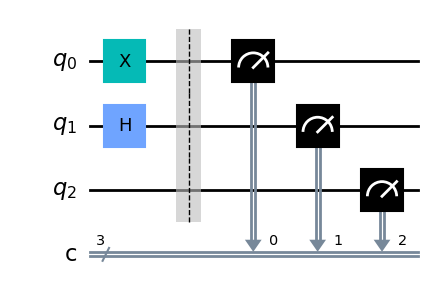

In [14]:
qr = QuantumRegister(3, name="q")
cr = ClassicalRegister(3, name="c")

qc = QuantumCircuit(qr, cr)
qc.x(qr[0])
qc.h(qr[1])
qc.barrier()
qc.measure(qr, cr)

qc.draw("mpl")

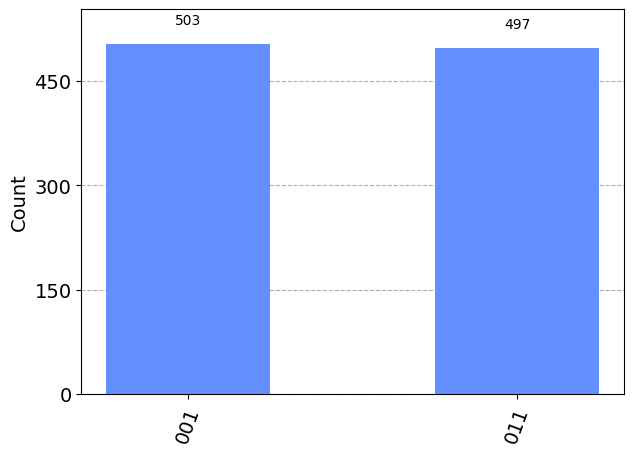

In [15]:
sim = AerSimulator()
transpiled_circuit = transpile(qc, sim)

# run job
shots = 1000
job = sim.run(transpiled_circuit, shots=shots)

# Get the results and display them
exp_result = job.result()
exp_counts = exp_result.get_counts()
plot_histogram(exp_counts)

In [16]:
marginal_counts(exp_counts, [0])

{'1': 1000}

In [17]:
marginal_counts(exp_counts, [1])

{'1': 497, '0': 503}

In [18]:
marginal_counts(exp_counts, [2])

{'0': 1000}